In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X,y = make_moons(n_samples=1000, noise=0.2, random_state=42)

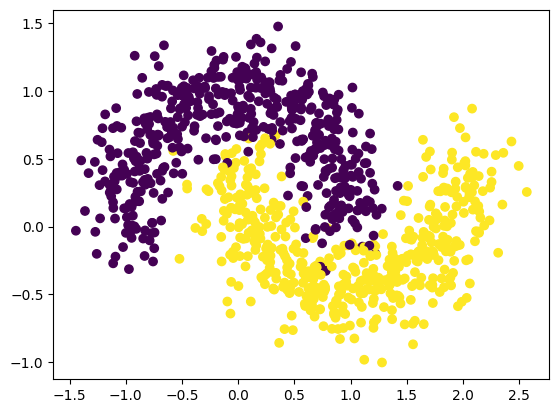

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model = Sequential()
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=500, verbose=False, validation_split=0.2)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


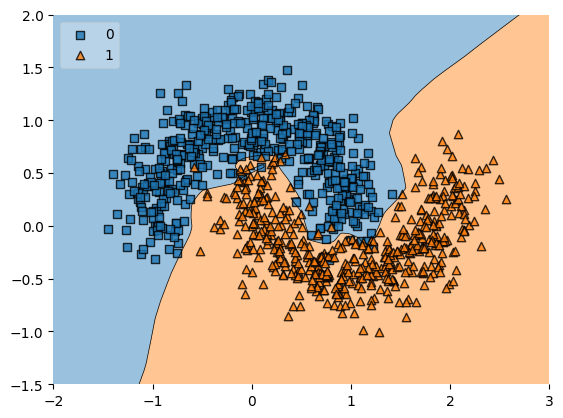

In [9]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

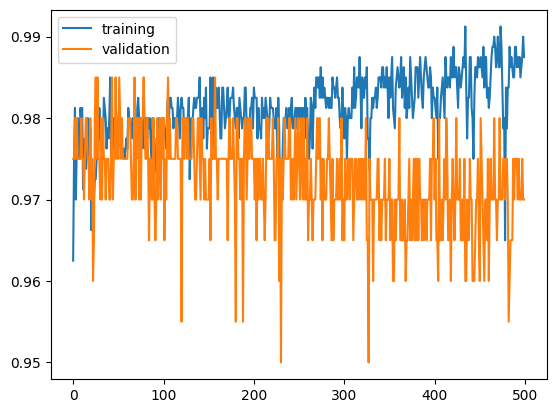

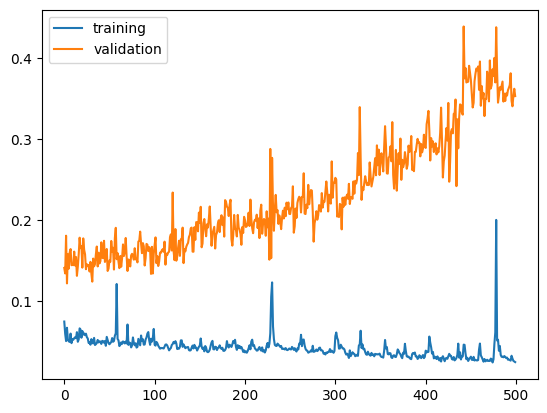

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [12]:
reg_l1_model = Sequential()
reg_l1_model.add(Dense(128, input_shape=(2,), activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
reg_l1_model.add(Dense(128, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
reg_l1_model.add(Dense(1, activation='sigmoid'))
reg_l1_model.summary()

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
adam = Adam(learning_rate=0.01)
reg_l1_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
req_history = reg_l1_model.fit(X, y, epochs=500, verbose=False, validation_split=0.2)

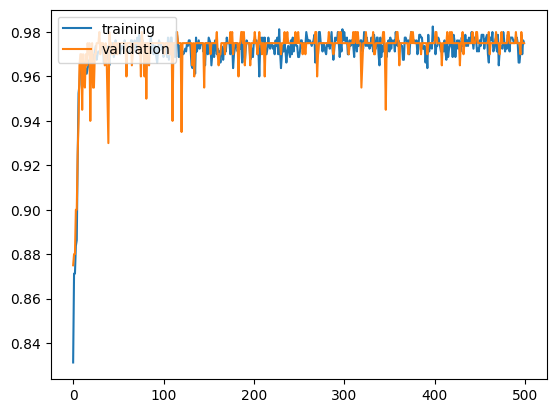

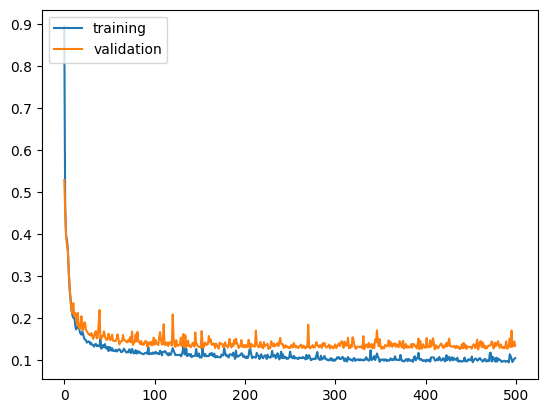

In [16]:
plt.plot(req_history.history['accuracy'])
plt.plot(req_history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()
plt.plot(req_history.history['loss'])
plt.plot(req_history.history['val_loss'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


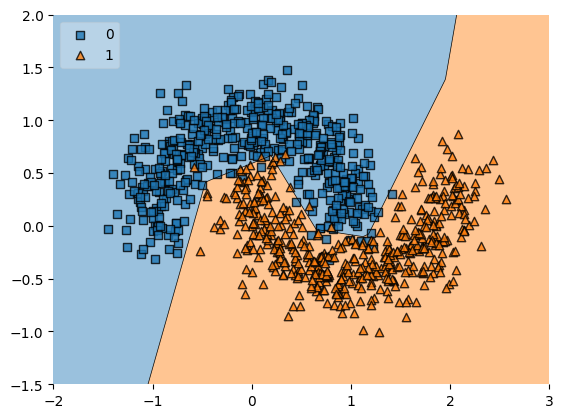

In [20]:
plot_decision_regions(X, y.astype('int'), clf=reg_l1_model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [21]:
req_l2_model = Sequential()
req_l2_model.add(Dense(128, input_shape=(2,), activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
req_l2_model.add(Dense(128, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
req_l2_model.add(Dense(1, activation='sigmoid'))
req_l2_model.summary()
adam = Adam(learning_rate=0.01)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
req_l2_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])



In [23]:
req_l2_history = req_l2_model.fit(X, y, epochs=500, verbose=False, validation_split=0.2)


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


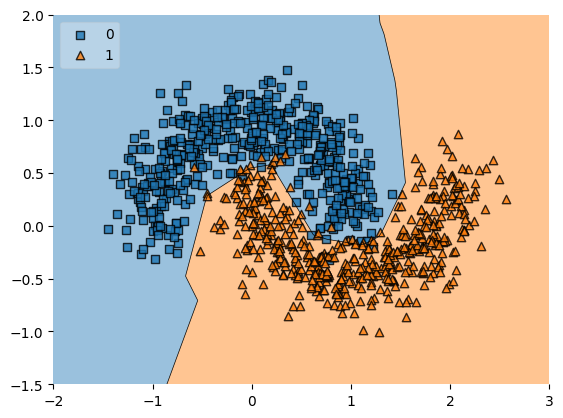

In [24]:
plot_decision_regions(X, y.astype('int'), clf=req_l2_model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

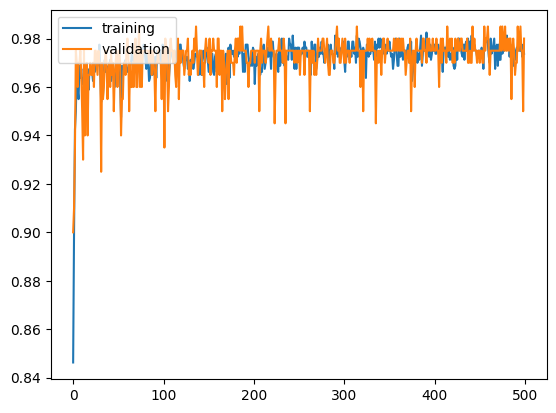

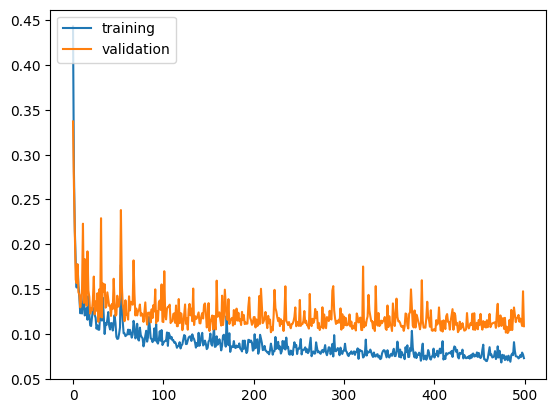

In [25]:
plt.plot(req_l2_history.history['accuracy'])
plt.plot(req_l2_history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()
plt.plot(req_l2_history.history['loss'])
plt.plot(req_l2_history.history['val_loss'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()


In [26]:
model_weight = model.get_weights()[0].reshape(256)
reg_l1_model_weight = reg_l1_model.get_weights()[0].reshape(256)
req_l2_model_weight = req_l2_model.get_weights()[0].reshape(256)


<Axes: ylabel='Density'>

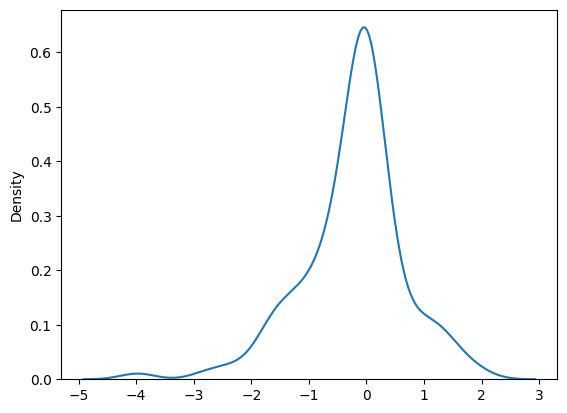

In [27]:
sns.kdeplot(model_weight, label='model')

<Axes: >

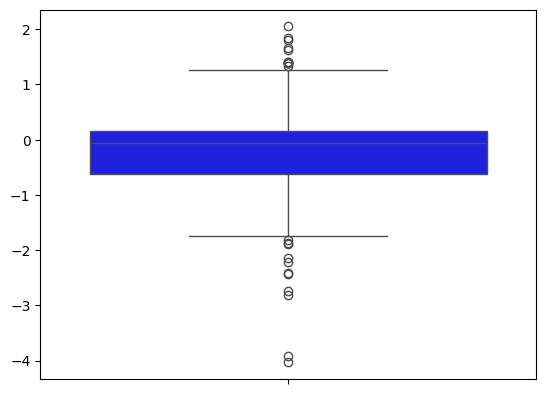

In [28]:
sns.boxplot(model_weight, color='blue')

<Axes: >

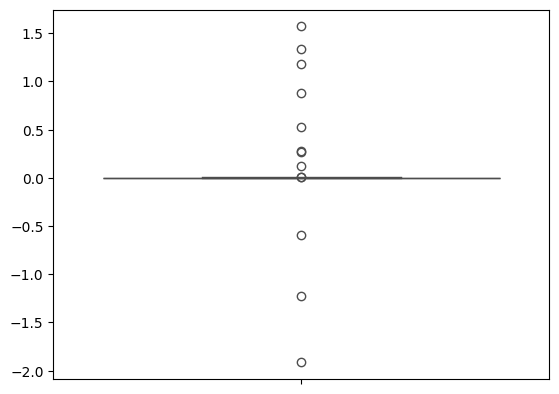

In [29]:
sns.boxplot(reg_l1_model_weight, color='orange')

<Axes: >

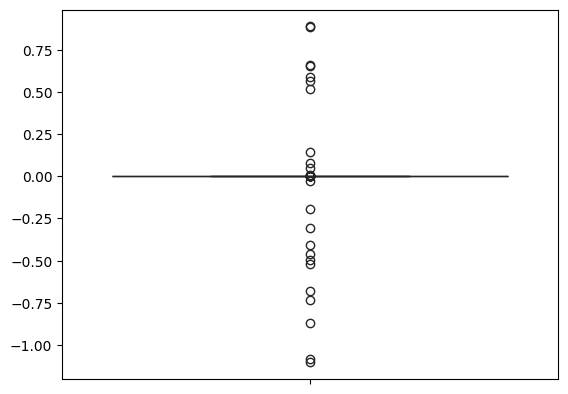

In [30]:
sns.boxplot(req_l2_model_weight, color='green')

In [32]:
print("Model weight min: ", model_weight.min())
print("Model weight max: ", model_weight.max())
print("L1 regularized model weight min: ", reg_l1_model_weight.min())
print("L1 regularized model weight max: ", reg_l1_model_weight.max())
print("L2 regularized model weight min: ", req_l2_model_weight.min())
print("L2 regularized model weight max: ", req_l2_model_weight.max())

Model weight min:  -4.0331073
Model weight max:  2.049639
L1 regularized model weight min:  -1.9131609
L1 regularized model weight max:  1.5713265
L2 regularized model weight min:  -1.1036471
L2 regularized model weight max:  0.8889272


ValueError: Maximum allowed size exceeded

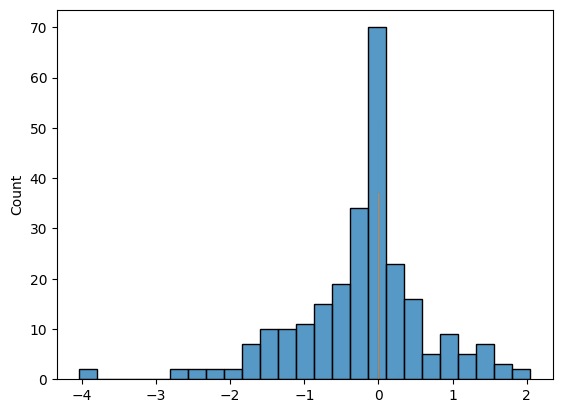

In [35]:
sns.histplot(model_weight)
sns.histplot(reg_l1_model_weight)


In [38]:
l2_weight = req_l2_model.get_weights()[0].reshape(256)

<Axes: ylabel='Count'>

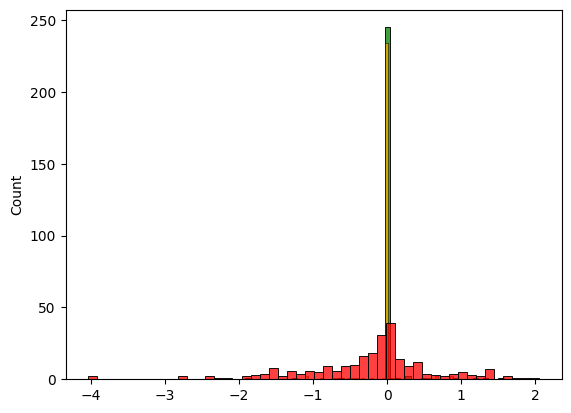

In [46]:
sns.histplot(reg_l1_model_weight, bins=50, color='green')
sns.histplot(l2_weight, bins=50, color='orange')
sns.histplot(model_weight, bins=50, color='red')